## PCA

In [21]:
import pandas as pd 
import numpy as np 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [22]:
house = pd.read_csv(r"C:\Users\leila\Downloads\pfaproject\house-price-prediction\notebooks\data processing\cleantrain.csv")
house = house.drop(columns=[col for col in ['Id', 'SalePrice'] if col in house.columns])
one_hot_cols = [col for col in house.columns if house[col].dropna().isin([True, False]).all()]
house = house.drop(columns=one_hot_cols)
print(house.head())

   LotFrontage  LotArea  LotShape  Utilities  LandSlope  OverallQual  \
0         65.0     8450         4          4          1            7   
1         80.0     9600         4          4          1            6   
2         68.0    11250         3          4          1            7   
3         60.0     9550         3          4          1            7   
4         84.0    14260         3          4          1            8   

   OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ...  OpenPorchSF  \
0            5       2003          2003       196.0  ...           61   
1            8       1976          1976         0.0  ...            0   
2            5       2001          2002       162.0  ...           42   
3            5       1915          1970         0.0  ...           35   
4            5       2000          2000       350.0  ...           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC  Fence  MiscVal  \
0              0          0            0         0

In [23]:
print(house.shape)

(1460, 55)


In [24]:
scaler = StandardScaler()
house_scaled = scaler.fit_transform(house)

In [25]:
pca = PCA()
pca.fit(house_scaled)
pca_data = pca.transform(house_scaled)

In [26]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range (1, len(per_var)+1)]

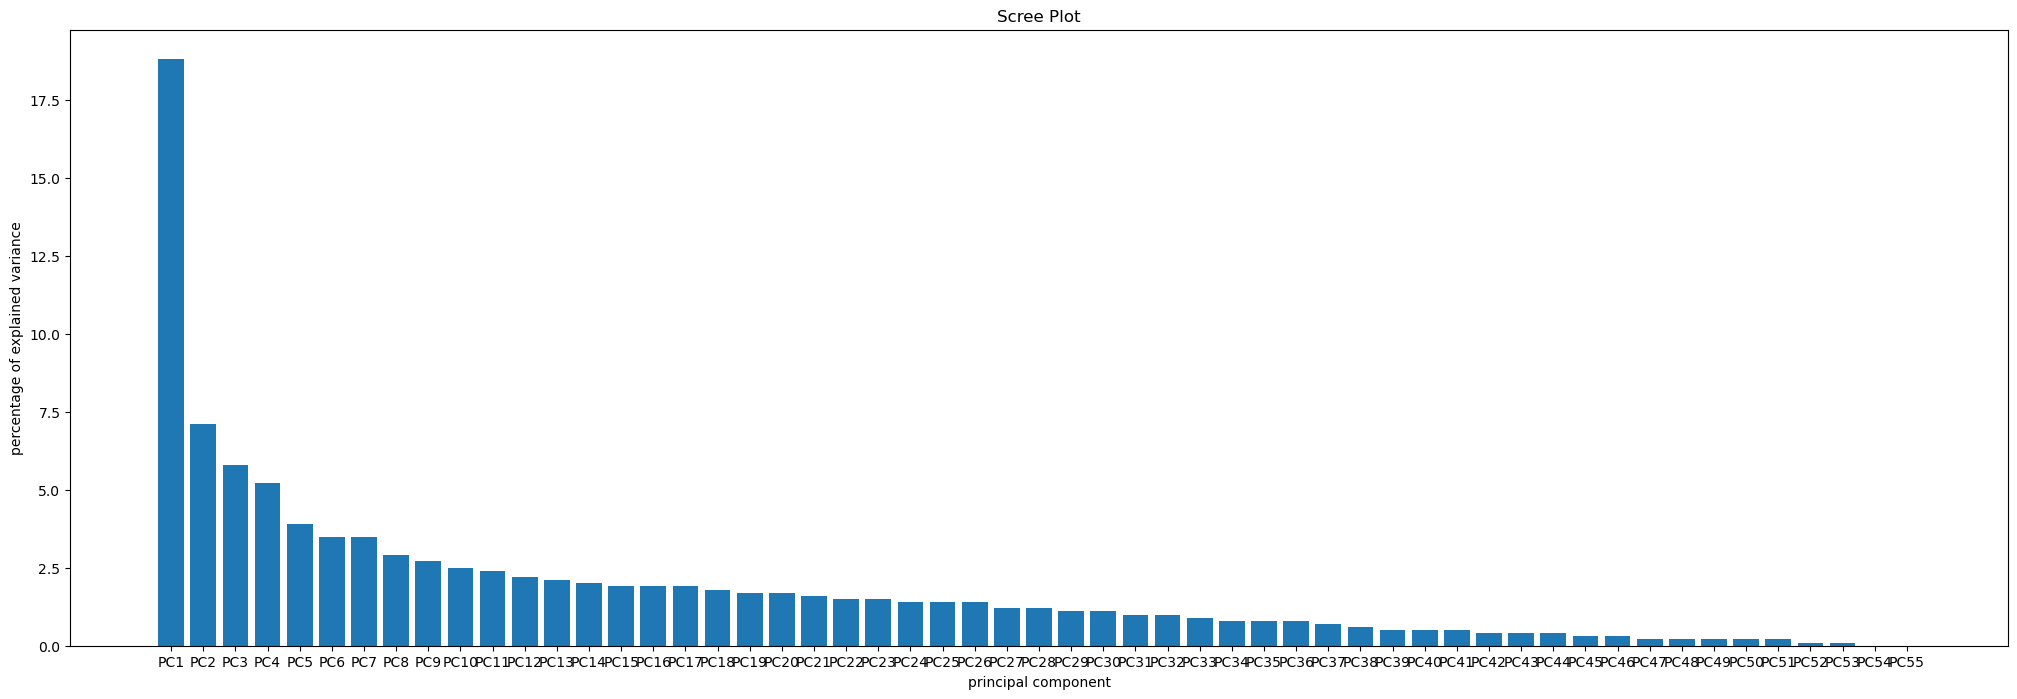

In [39]:
plt.figure(figsize=(25, 8))
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('percentage of explained variance')
plt.xlabel('principal component')
plt.title('Scree Plot')
plt.show()

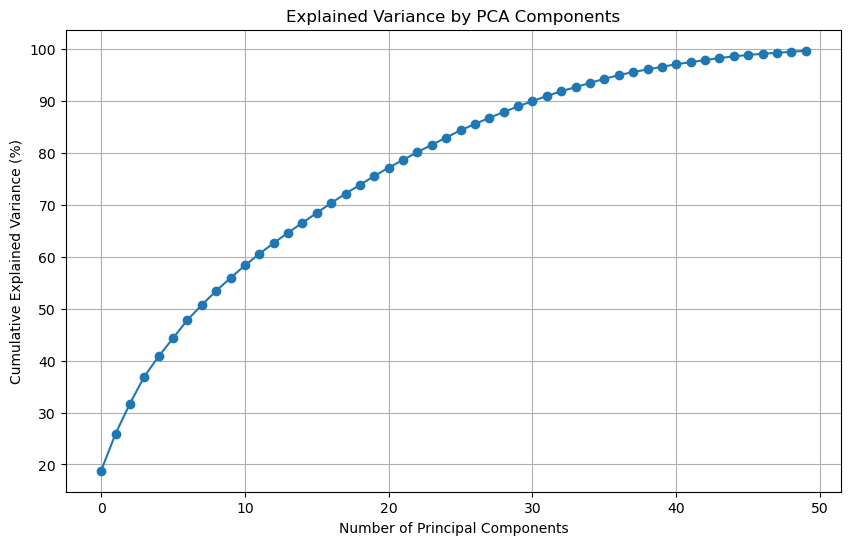

In [32]:
cumulative = np.cumsum(per_var)
plt.figure(figsize=(10, 6))
plt.plot(cumulative[:50], marker='o')  # adjust number if needed
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance (%)")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.show()


In [34]:
cumulative_var = np.cumsum(per_var)
num_needed = np.argmax(cumulative_var >= 95) + 1
print(f"Number of components needed to explain 95% variance: {num_needed}")


Number of components needed to explain 95% variance: 38


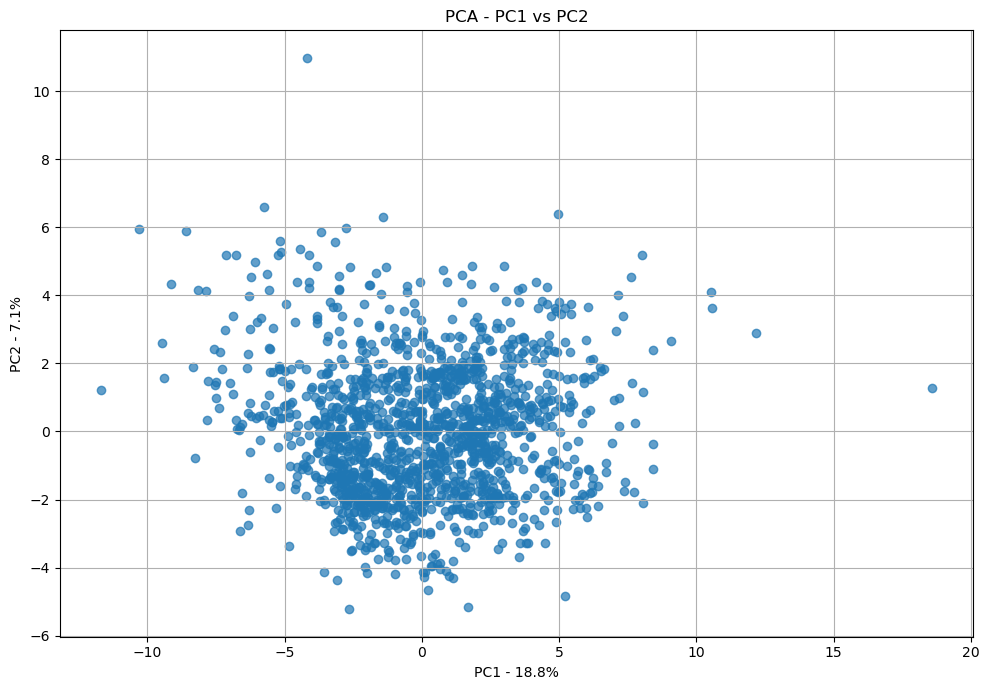

In [35]:
# Create a DataFrame of the PCA-transformed data
pca_df = pd.DataFrame(pca_data, columns=labels)

# Scatter plot of PC1 vs PC2
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.title('PCA - PC1 vs PC2')
plt.xlabel(f'PC1 - {per_var[0]}%')
plt.ylabel(f'PC2 - {per_var[1]}%')
plt.grid(True)
plt.tight_layout()
plt.show()


## PC 1

In [ ]:
# Get feature names (column names before PCA)
features = house.columns

# Get loading scores (weights) for PC1
loading_scores = pd.Series(pca.components_[0], index=features)

# Sort by absolute value
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

# top 10 contributing features to PC1
top_10_features = sorted_loading_scores.head(10).index

# Print actual loading scores (with sign)
print("Top 10 features contributing to PC1:")
print(loading_scores[top_10_features])


Top 10 features contributing to PC1:
OverallQual     0.257230
GarageCars      0.244069
GarageArea      0.236502
ExterQual       0.230389
GarageFinish    0.223553
KitchenQual     0.221485
BsmtQual        0.216591
YearBuilt       0.214002
TotalBsmtSF     0.213973
GrLivArea       0.212122
dtype: float64


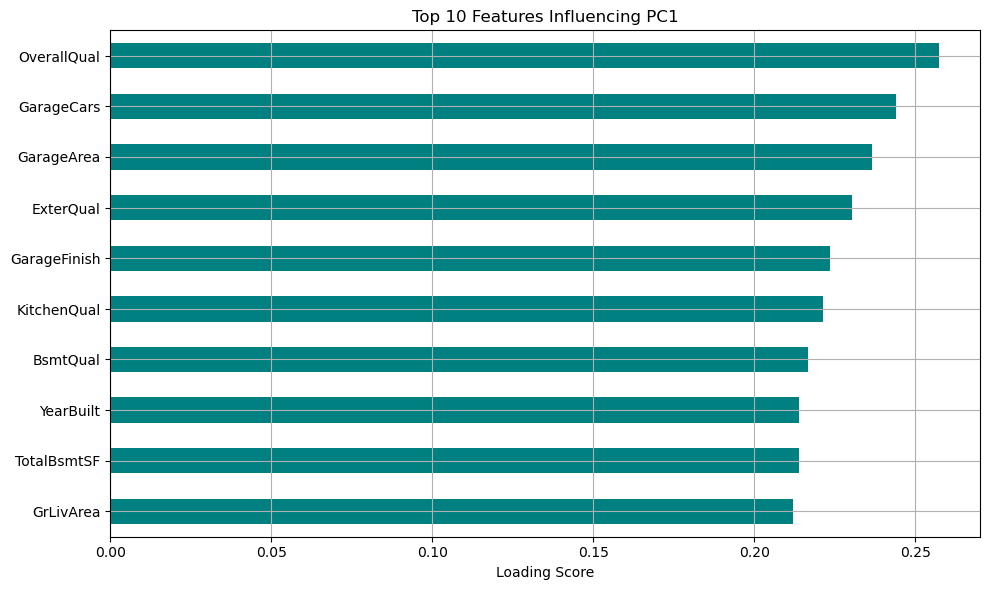

In [ ]:
# top 10 features contributing to PC1
plt.figure(figsize=(10, 6))
loading_scores[top_10_features].sort_values().plot(kind='barh', color='teal')
plt.title('Top 10 Features Influencing PC1')
plt.xlabel('Loading Score')
plt.grid(True)
plt.tight_layout()
plt.show()


## PC 2

In [41]:
# Get feature names (column names before PCA)
features = house.columns

# Get loading scores (weights) for PC1
loading_scores = pd.Series(pca.components_[1], index=features)

# Sort by absolute value
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

# top 10 contributing features to PC1
top_10_features_pc2 = sorted_loading_scores.head(10).index

# Print actual loading scores (with sign)
print("Top 10 features contributing to PC2:")
print(loading_scores[top_10_features])

Top 10 features contributing to PC2:
TotRmsAbvGrd    0.341297
2ndFlrSF        0.328839
BedroomAbvGr    0.321965
GrLivArea       0.289642
BsmtFinType1   -0.277891
BsmtFullBath   -0.259251
BsmtFinSF1     -0.235089
BsmtUnfSF       0.217531
FullBath        0.213776
KitchenAbvGr    0.174121
dtype: float64


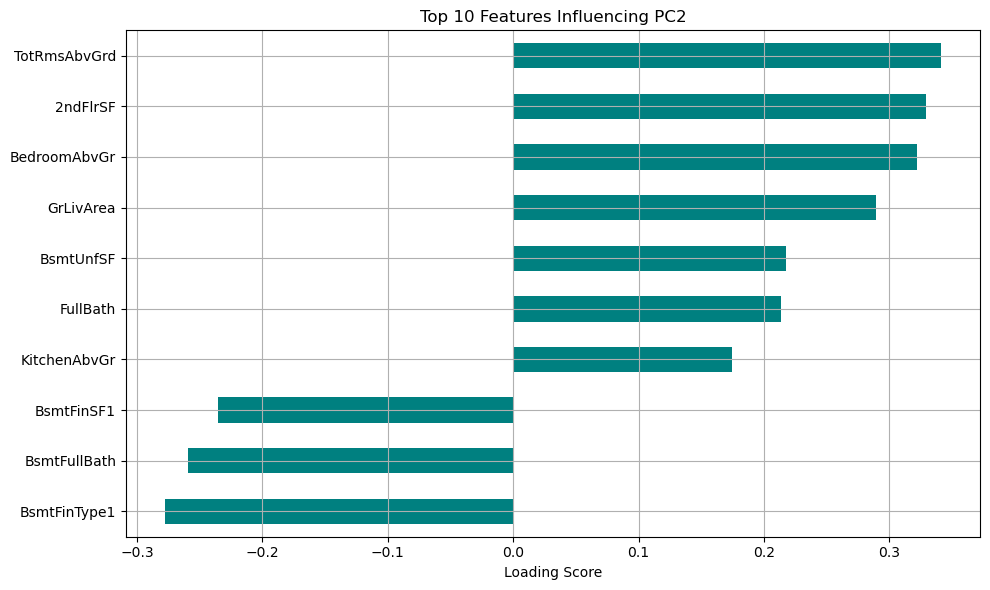

In [42]:
# top 10 features contributing to PC2
plt.figure(figsize=(10, 6))
loading_scores[top_10_features_pc2].sort_values().plot(kind='barh', color='teal')
plt.title('Top 10 Features Influencing PC2')
plt.xlabel('Loading Score')
plt.grid(True)
plt.tight_layout()
plt.show()